In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
# os.environ['PYTHONPATH'] += ':/content/gdrive/MyDrive/22FL/CS101-TA/optimized_bio_sensor/RockleyCodesign'
os.environ['PYTHONPATH'] += ':/content/gdrive/MyDrive/optimized_bio_sensor/rockley'
# %cd /content/gdrive/MyDrive/22FL/CS101-TA/optimized_bio_sensor/RockleyCodesign
%cd /content/gdrive/MyDrive/optimized_bio_sensor/rockley

Mounted at /content/gdrive
/content/gdrive/.shortcut-targets-by-id/1EaHvULJYewcfEpQ7wlYgmG1eRbVcahUv/optimized_bio_sensor/rockley


In [ ]:
import numpy as np

In [ ]:
import utils.data as data_loader
 
train, val, test = data_loader.load_train_test_val(
    trainfile="../data/train_regression.parquet",
    testfile="../data/test_regression.parquet",
    standardize=False,
    precision=64,
)

Xtrain, Ytrain = train
Xval, Yval = val
Xtest, Ytest = test

# Take a subset to speed up training
# Also reshape Y for PyTorch MSELoss
Xsub_train, Ysub_train = Xtrain[:], Ytrain[:]

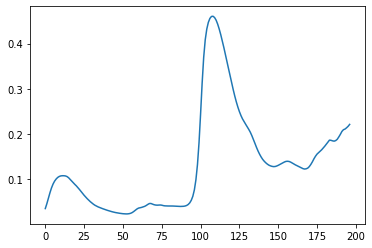

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.std(Xsub_train, axis=0))
plt.show()

In [ ]:
np.shape(Xsub_train)

(128000, 197)

In [ ]:
# Save a state in case Colab crashes/times out
idxs = []
idxs = [50, 91, 97, 9, 33, 29, 49, 45, 46, 48, 47, 32, 6, 44, 34, 90, 22, 87, 145, 20, 10, 25, 8, 7, 30, 31, 58, 40, 43, 79, 42, 94, 15, 51, 54, 55, 96, 19, 59, 174, 14, 12, 41, 98, 35, 21, 164, 36, 92, 84, 24, 77, 39, 85, 82, 83, 16, 18, 183, 71, 60, 37, 28, 26, 149, 178, 173, 73, 191, 75, 23, 61, 57, 93, 70, 193, 5, 194, 81, 89, 118, 150, 86, 80, 13, 4, 136, 110, 144, 147, 135, 125, 162, 114, 88, 130, 124, 185, 67, 195, 184, 187, 72, 122, 62, 127, 113, 182, 148, 142, 172, 139, 151, 53, 52, 11, 2, 190, 132, 175, 0, 1, 63, 74, 109, 99, 188, 3, 17, 138, 64, 65, 189, 126, 100, 95, 140, 179, 38, 143, 160, 165, 161, 177, 102, 186, 129, 180, 128, 27, 56, 163, 121, 123, 196, 112, 117, 69, 68, 146, 66, 133, 134, 115, 137, 104, 181, 111, 78, 192, 170, 168, 171, 176, 169, 141, 152, 167, 153, 154, 166, 108, 106, 159, 158, 76, 156, 155, 157, 116, 103, 101, 105, 107, 120, 119, 131]


In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression

added_idxs = idxs[::]
added_set = set(added_idxs)
mse_losses = []
for i in range(len(added_idxs), 197):
  if i % 10 == 0:
    print(i)

  best = -1
  best_val = float('inf')
  for j in range(197):
    if j not in added_set:
      cut = added_idxs + [j]
      Xcut = Xsub_train[:, cut]
      regr = LinearRegression()
      regr.fit(Xcut, Ysub_train)

      mse = sklearn.metrics.mean_squared_error(regr.predict(Xcut), Ysub_train)
      if mse < best_val:
        best = j
        best_val = mse
    
  added_set.add(best)
  added_idxs.append(best)
  mse_losses.append(best_val)

160
170
180
190


In [ ]:
print(added_idxs)

[50, 91, 97, 9, 33, 29, 49, 45, 46, 48, 47, 32, 6, 44, 34, 90, 22, 87, 145, 20, 10, 25, 8, 7, 30, 31, 58, 40, 43, 79, 42, 94, 15, 51, 54, 55, 96, 19, 59, 174, 14, 12, 41, 98, 35, 21, 164, 36, 92, 84, 24, 77, 39, 85, 82, 83, 16, 18, 183, 71, 60, 37, 28, 26, 149, 178, 173, 73, 191, 75, 23, 61, 57, 93, 70, 193, 5, 194, 81, 89, 118, 150, 86, 80, 13, 4, 136, 110, 144, 147, 135, 125, 162, 114, 88, 130, 124, 185, 67, 195, 184, 187, 72, 122, 62, 127, 113, 182, 148, 142, 172, 139, 151, 53, 52, 11, 2, 190, 132, 175, 0, 1, 63, 74, 109, 99, 188, 3, 17, 138, 64, 65, 189, 126, 100, 95, 140, 179, 38, 143, 160, 165, 161, 177, 102, 186, 129, 180, 128, 27, 56, 163, 121, 123, 196, 112, 117, 69, 68, 146, 66, 133, 134, 115, 137, 104, 181, 111, 78, 192, 170, 168, 171, 176, 169, 141, 152, 167, 153, 154, 166, 108, 106, 159, 158, 76, 156, 155, 157, 116, 103, 101, 105, 107, 120, 119, 131]


In [ ]:
idxs = [50, 91, 97, 9, 33, 29, 49, 45, 46, 48, 47, 32, 6, 44, 34, 90, 22, 87, 145, 20, 10, 25, 8, 7, 30, 31, 58, 40, 43, 79, 42, 94, 15, 51, 54, 55, 96, 19, 59, 174, 14, 12, 41, 98, 35, 21, 164, 36, 92, 84, 24, 77, 39, 85, 82, 83, 16, 18, 183, 71, 60, 37, 28, 26, 149, 178, 173, 73, 191, 75, 23, 61, 57, 93, 70, 193, 5, 194, 81, 89, 118, 150, 86, 80, 13, 4, 136, 110, 144, 147, 135, 125, 162, 114, 88, 130, 124, 185, 67, 195, 184, 187, 72, 122, 62, 127, 113, 182, 148, 142, 172, 139, 151, 53, 52, 11, 2, 190, 132, 175, 0, 1, 63, 74, 109, 99, 188, 3, 17, 138, 64, 65, 189, 126, 100, 95, 140, 179, 38, 143, 160, 165, 161, 177, 102, 186, 129, 180, 128, 27, 56, 163, 121, 123, 196, 112, 117, 69, 68, 146, 66, 133, 134, 115, 137, 104, 181, 111, 78, 192, 170, 168, 171, 176, 169, 141, 152, 167, 153, 154, 166, 108, 106, 159, 158, 76, 156, 155, 157, 116, 103, 101, 105, 107, 120, 119, 131]

import sklearn
from sklearn.linear_model import LinearRegression

regr.fit(Xsub_train[:, idxs], Ysub_train)
mse = sklearn.metrics.mean_squared_error(regr.predict(Xval[:, idxs]), Yval)
print(mse)

0.24399562100524927


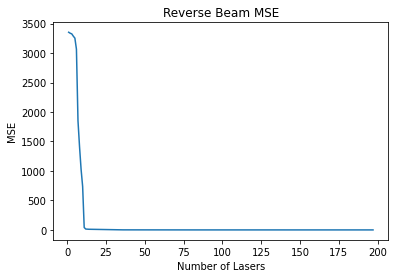

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

val_losses = []
for i in range(197):
  regr = LinearRegression()
  regr.fit(Xsub_train[:, idxs[:i + 1]], Ysub_train)

  mse = sklearn.metrics.mean_squared_error(regr.predict(Xval[:, idxs[:i + 1]]), Yval)
  val_losses.append(mse)

plt.plot(range(1, 198), val_losses)
plt.title("Reverse Beam MSE")
plt.ylabel("MSE")
plt.xlabel("Number of Lasers")
plt.show()

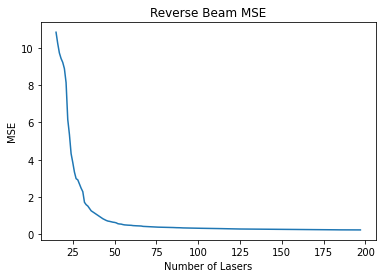

In [ ]:
plt.plot(range(15, 198), val_losses[14:])
plt.title("Reverse Beam MSE")
plt.ylabel("MSE")
plt.xlabel("Number of Lasers")
plt.show()

# Noisify

In [ ]:
import utils.data as data_loader
 
train, val, test = data_loader.load_train_test_val(
    trainfile="../data/train_regression.parquet",
    testfile="../data/test_regression.parquet",
    standardize=True,
    precision=64,
    noise=0
)

Xtrain, Ytrain = train
Xval, Yval = val
Xtest, Ytest = test

# Take a subset to speed up training
# Also reshape Y for PyTorch MSELoss
Xsub_train, Ysub_train = Xtrain[:], Ytrain[:]

In [ ]:
idxs = [50, 91, 97, 9, 33, 29, 49, 45, 46, 48, 47, 32, 6, 44, 34, 90, 22, 87, 145, 20, 10, 25, 8, 7, 30, 31, 58, 40, 43, 79, 42, 94, 15, 51, 54, 55, 96, 19, 59, 174, 14, 12, 41, 98, 35, 21, 164, 36, 92, 84, 24, 77, 39, 85, 82, 83, 16, 18, 183, 71, 60, 37, 28, 26, 149, 178, 173, 73, 191, 75, 23, 61, 57, 93, 70, 193, 5, 194, 81, 89, 118, 150, 86, 80, 13, 4, 136, 110, 144, 147, 135, 125, 162, 114, 88, 130, 124, 185, 67, 195, 184, 187, 72, 122, 62, 127, 113, 182, 148, 142, 172, 139, 151, 53, 52, 11, 2, 190, 132, 175, 0, 1, 63, 74, 109, 99, 188, 3, 17, 138, 64, 65, 189, 126, 100, 95, 140, 179, 38, 143, 160, 165, 161, 177, 102, 186, 129, 180, 128, 27, 56, 163, 121, 123, 196, 112, 117, 69, 68, 146, 66, 133, 134, 115, 137, 104, 181, 111, 78, 192, 170, 168, 171, 176, 169, 141, 152, 167, 153, 154, 166, 108, 106, 159, 158, 76, 156, 155, 157, 116, 103, 101, 105, 107, 120, 119, 131]

import sklearn
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(Xsub_train[:, idxs], Ysub_train)
mse = sklearn.metrics.mean_squared_error(regr.predict(Xval[:, idxs]), Yval)
print(mse)

0.24399562100524927


In [ ]:
noises = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]

losses = []
for noise in noises:
  train, val, test = data_loader.load_train_test_val(
    trainfile="../data/train_regression.parquet",
    testfile="../data/test_regression.parquet",
    standardize=True,
    precision=64,
    truncate=0.1,
    noise=noise
  )

  Xtrain, Ytrain = train
  Xval, Yval = val
  Xtest, Ytest = test

  Xsub_train, Ysub_train = Xtrain[:], Ytrain[:]

  losses.append([])
  for i in range(197):
    regr = LinearRegression()
    regr.fit(Xsub_train[:, idxs[:i + 1]], Ysub_train)

    mse = sklearn.metrics.mean_squared_error(regr.predict(Xval[:, idxs[:i + 1]]), Yval)
    losses[-1].append(mse)
  


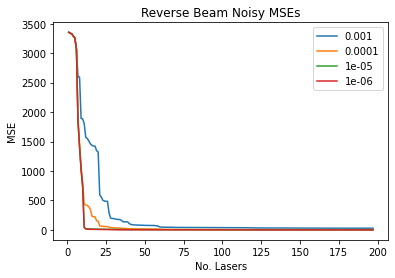

In [ ]:
import matplotlib.pyplot as plt

for i in range(2, len(noises)):
  plt.plot(range(1, 198), losses[i])
plt.title("Reverse Beam Noisy MSEs")
plt.xlabel("No. Lasers")
plt.ylabel("MSE")
plt.legend([str(i) for i in noises])
plt.show()

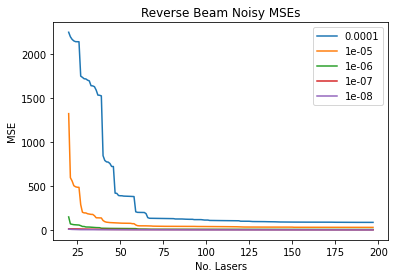

In [ ]:
import matplotlib.pyplot as plt

show = 1
for i in range(show, len(noises)):
  plt.plot(range(20, 198), losses[i][19:])
plt.title("Reverse Beam Noisy MSEs")
plt.xlabel("No. Lasers")
plt.ylabel("MSE")
plt.legend([str(i) for i in noises[show:]])
plt.show()

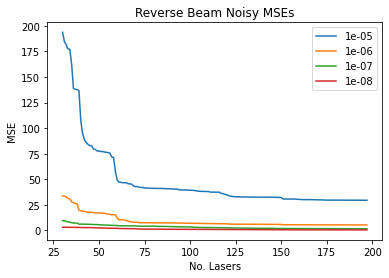

In [ ]:
import matplotlib.pyplot as plt

show = 2
for i in range(show, len(noises)):
  plt.plot(range(30, 198), losses[i][29:])
plt.title("Reverse Beam Noisy MSEs")
plt.xlabel("No. Lasers")
plt.ylabel("MSE")
plt.legend([str(i) for i in noises[show:]])
plt.show()